In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
clamis=pd.read_csv('/content/drive/MyDrive/121_finial/Train_Claim.csv',na_values=['?','#',','])

In [19]:
test_clamis=pd.read_csv('/content/drive/MyDrive/121_finial/Test_Claim.csv',na_values=['?','#',','])

In [20]:
demo=pd.read_csv('/content/drive/MyDrive/121_finial/Train_Demographics.csv',na_values=['?','#',','])

In [21]:
test_demo=pd.read_csv('/content/drive/MyDrive/121_finial/Test_Demographics.csv',na_values=['?','#',','])

In [22]:
poli=pd.read_csv('/content/drive/MyDrive/121_finial/Train_Policy.csv',na_values=['?','#',','])

In [23]:
test_poli=pd.read_csv('/content/drive/MyDrive/121_finial/Test_Policy.csv',na_values=['?','#',','])

In [24]:
#vech=pd.read_csv('/content/drive/MyDrive/121_finial/Train_Vehicle.csv',na_values=['?','#',','])

In [25]:
vechid=pd.read_csv('/content/drive/MyDrive/121_finial/train_vechid.csv',na_values=['?','#',','])

In [26]:
vechid

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust13038,VehicleID,Vehicle30212
2,Cust1801,VehicleID,Vehicle24096
3,Cust14947,VehicleID,Vehicle15216
4,Cust19144,VehicleID,Vehicle29018
...,...,...,...
28831,Cust2970,VehicleID,Vehicle19228
28832,Cust19731,VehicleID,Vehicle12644
28833,Cust25338,VehicleID,Vehicle28831
28834,Cust7637,VehicleID,Vehicle12870


In [27]:
vechid['vech_id']=vechid['VehicleAttributeDetails']
vechid.drop(['VehicleAttributeDetails','VehicleAttribute'],axis=1,inplace=True)
vechid

,CustomerID,vech_id
0,Cust20179,Vehicle8898
1,Cust13038,Vehicle30212
2,Cust1801,Vehicle24096
3,Cust14947,Vehicle15216
4,Cust19144,Vehicle29018
...,...,...
28831,Cust2970,Vehicle19228
28832,Cust19731,Vehicle12644
28833,Cust25338,Vehicle28831
28834,Cust7637,Vehicle12870


In [28]:
test_vechid=pd.read_csv('/content/drive/MyDrive/121_finial/test_vechid.csv',na_values=['?','#',','])

In [29]:
test_vechid['vech_id']=test_vechid['VehicleAttributeDetails']
test_vechid.drop(['VehicleAttributeDetails','VehicleAttribute'],axis=1,inplace=True)
test_vechid

,CustomerID,vech_id
0,Cust3683,Vehicle22709
1,Cust29385,Vehicle20347
2,Cust23669,Vehicle33702
3,Cust30303,Vehicle2549
4,Cust16417,Vehicle17131
...,...,...
8907,Cust10374,Vehicle29321
8908,Cust4635,Vehicle24404
8909,Cust33915,Vehicle24485
8910,Cust21696,Vehicle32150


In [30]:
yom=pd.read_csv('/content/drive/MyDrive/121_finial/train_yom.csv',na_values=['?','#',','])

In [31]:
yom

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust21334,VehicleYOM,1996
1,Cust26634,VehicleYOM,1999
2,Cust21432,VehicleYOM,2002
3,Cust22845,VehicleYOM,2000
4,Cust30659,VehicleYOM,2003
...,...,...,...
28831,Cust13546,VehicleYOM,2011
28832,Cust27958,VehicleYOM,2015
28833,Cust27100,VehicleYOM,2011
28834,Cust11761,VehicleYOM,1997


In [32]:
yom['vech_yom']=yom['VehicleAttributeDetails']
yom.drop(['VehicleAttribute','VehicleAttributeDetails'],axis=1,inplace=True)
yom

,CustomerID,vech_yom
0,Cust21334,1996
1,Cust26634,1999
2,Cust21432,2002
3,Cust22845,2000
4,Cust30659,2003
...,...,...
28831,Cust13546,2011
28832,Cust27958,2015
28833,Cust27100,2011
28834,Cust11761,1997


In [33]:
test_yom=pd.read_csv('/content/drive/MyDrive/121_finial/test_yom.csv',na_values=['?','#',','])

In [34]:
test_yom['vech_yom']=test_yom['VehicleAttributeDetails']
test_yom.drop(['VehicleAttribute','VehicleAttributeDetails'],axis=1,inplace=True)
test_yom

,CustomerID,vech_yom
0,Cust1890,2007
1,Cust2807,2005
2,Cust32761,2001
3,Cust17713,2007
4,Cust26913,1997
...,...,...
8907,Cust30492,2004
8908,Cust31042,2002
8909,Cust25063,2007
8910,Cust8848,1996


In [35]:
make=pd.read_csv('/content/drive/MyDrive/121_finial/train_vechmake.csv',na_values=['?','#',','])

In [36]:
make['vech_make_company']=make['VehicleAttributeDetails']


In [37]:
make

,CustomerID,VehicleAttribute,VehicleAttributeDetails,vech_make_company
0,Cust33335,VehicleMake,Toyota,Toyota
1,Cust20624,VehicleMake,Chevrolet,Chevrolet
2,Cust9006,VehicleMake,Accura,Accura
3,Cust18447,VehicleMake,Honda,Honda
4,Cust17021,VehicleMake,BMW,BMW
...,...,...,...,...
28831,Cust27692,VehicleMake,Ford,Ford
28832,Cust2507,VehicleMake,Saab,Saab
28833,Cust17851,VehicleMake,Chevrolet,Chevrolet
28834,Cust11205,VehicleMake,Chevrolet,Chevrolet


In [38]:
make.drop(['VehicleAttribute','VehicleAttributeDetails'],axis=1,inplace=True)

In [39]:
test_make=pd.read_csv('/content/drive/MyDrive/121_finial/test_vech_make.csv',na_values=['?','#',','])

In [40]:
test_make['vech_make_company']=test_make['VehicleAttributeDetails']
test_make.drop(['VehicleAttribute','VehicleAttributeDetails'],axis=1,inplace=True)
test_make

,CustomerID,vech_make_company
0,Cust33822,Volkswagen
1,Cust5135,Audi
2,Cust8266,BMW
3,Cust37142,Jeep
4,Cust30447,Ford
...,...,...
8907,Cust8984,Volkswagen
8908,Cust30476,Toyota
8909,Cust30878,Volkswagen
8910,Cust11488,Jeep


In [41]:
made=pd.read_csv('/content/drive/MyDrive/121_finial/train_vech_made.csv',na_values=['?','#',','])

In [42]:
made

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust21384,VehicleModel,Malibu
1,Cust27118,VehicleModel,Neon
2,Cust30237,VehicleModel,RAM
3,Cust23684,VehicleModel,Neon
4,Cust35737,VehicleModel,Wrangler
...,...,...,...
28831,Cust38183,VehicleModel,95
28832,Cust27059,VehicleModel,Maxima
28833,Cust4899,VehicleModel,92x
28834,Cust7088,VehicleModel,F150


In [43]:
made['vech_made_company']=made['VehicleAttributeDetails']
made.drop(['VehicleAttributeDetails','VehicleAttribute'],axis=1,inplace=True)
made

,CustomerID,vech_made_company
0,Cust21384,Malibu
1,Cust27118,Neon
2,Cust30237,RAM
3,Cust23684,Neon
4,Cust35737,Wrangler
...,...,...
28831,Cust38183,95
28832,Cust27059,Maxima
28833,Cust4899,92x
28834,Cust7088,F150


In [44]:
test_made=pd.read_csv('/content/drive/MyDrive/121_finial/test_model.csv',na_values=['?','#',','])

In [45]:
test_made['vech_made_company']=test_made['VehicleAttributeDetails']
test_made.drop(['VehicleAttributeDetails','VehicleAttribute'],axis=1,inplace=True)
test_made

,CustomerID,vech_made_company
0,Cust28465,92x
1,Cust20319,Jetta
2,Cust34403,Camry
3,Cust2595,X6
4,Cust8061,Civic
...,...,...
8907,Cust14970,Jetta
8908,Cust1008,A5
8909,Cust28649,X6
8910,Cust1980,95


In [46]:
target=pd.read_csv('/content/drive/MyDrive/121_finial/Traindata_with_Target.csv',na_values=['?','#',','])

In [47]:
target

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y
...,...,...
28831,Cust9773,N
28832,Cust38439,N
28833,Cust38444,N
28834,Cust26466,N


In [48]:
target['ReportedFraud'] = target['ReportedFraud'].apply(lambda x: 1 if x == "Y" else 0)


In [49]:
target

,CustomerID,ReportedFraud
0,Cust20065,0
1,Cust37589,0
2,Cust24312,0
3,Cust5493,1
4,Cust7704,1
...,...,...
28831,Cust9773,0
28832,Cust38439,0
28833,Cust38444,0
28834,Cust26466,0


In [50]:
print(clamis.shape)
print(demo.shape)
print(poli.shape)
print(target.shape)
print(vechid.shape)
print(yom.shape)
print(make.shape)
print(made.shape)

(28836, 19)
(28836, 10)
(28836, 10)
(28836, 2)
(28836, 2)
(28836, 2)
(28836, 2)
(28836, 2)


In [51]:
print(test_clamis.shape)
print(test_demo.shape)
print(test_poli.shape)
#print(test_target.shape)
print(test_vechid.shape)
print(test_yom.shape)
print(test_make.shape)
print(test_made.shape)

(8912, 19)
(8912, 10)
(8912, 10)
(8912, 2)
(8912, 2)
(8912, 2)
(8912, 2)


In [52]:
#vech.columns

In [53]:
df1=pd.merge(clamis,vechid,on='CustomerID',how='left')

In [54]:
df2=pd.merge(df1,yom,on='CustomerID',how='left')

In [55]:
df3=pd.merge(df2,make,on='CustomerID',how='left')

In [56]:
df4=pd.merge(df3,made,on='CustomerID',how='left')

In [57]:
df5=pd.merge(df4,demo,on='CustomerID',how='left')

In [58]:
df6=pd.merge(df5,poli,on='CustomerID',how='left')

In [271]:
train=pd.merge(df6,target,on='CustomerID',how='left')

In [60]:
df1=pd.merge(test_clamis,test_vechid,on='CustomerID',how='left')

In [61]:
df2=pd.merge(df1,test_yom,on='CustomerID',how='left')

In [62]:
df3=pd.merge(df2,test_make,on='CustomerID',how='left')

In [63]:
df4=pd.merge(df3,test_made,on='CustomerID',how='left')

In [64]:
df5=pd.merge(df4,test_demo,on='CustomerID',how='left')

In [272]:
test=pd.merge(df5,test_poli,on='CustomerID',how='left')

In [273]:
test.shape

(8912, 41)

In [274]:
train.shape

(28836, 42)

In [275]:
test.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'vech_id', 'vech_yom', 'vech_make_company',
       'vech_made_company', 'InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'Country', 'InsurancePolicyNumber',
       'CustomerLoyaltyPeriod', 'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship'],
      dtype='object')

In [276]:
test_cat_cols

Index(['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'vech_yom', 'vech_make_company', 'vech_made_company',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit'],
      dtype='object')

In [277]:
test.shape

(8912, 41)

In [278]:
test['TypeOfCollission'].value_counts()

Rear Collision     2602
Side Collision     2388
Front Collision    2159
Name: TypeOfCollission, dtype: int64

In [279]:
train.shape

(28836, 42)

In [280]:
train['TypeOfCollission'].value_counts()

Rear Collision     8561
Side Collision     7867
Front Collision    7246
Name: TypeOfCollission, dtype: int64

In [281]:
test['TypeOfCollission']=

SyntaxError: ignored

In [282]:
train

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,ReportedFraud
0,Cust10000,2/3/2015,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,119121,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,0
1,Cust10001,2/2/2015,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,119122,114,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family,0
2,Cust10002,1/15/2015,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,119123,167,2001-02-12,State3,500/1000,617,1373.38,0,wife,0
3,Cust10003,1/19/2015,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,119124,190,2005-04-11,State2,500/1000,722,1337.60,0,own-child,0
4,Cust10004,1/9/2015,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,119125,115,1996-10-25,State2,100/300,500,1353.73,4279863,unmarried,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,1/24/2015,Vehicle Theft,NaN,Trivial Damage,Police,State9,City4,Location 1890,3,...,119114,321,1998-04-18,State1,500/1000,655,1276.01,0,unmarried,0
28832,Cust9994,2/9/2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17,...,119115,237,2004-09-07,State2,100/300,1089,1273.38,0,unmarried,0
28833,Cust9996,1/28/2015,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1,...,119117,392,1998-09-10,State3,250/500,787,1380.92,3448735,own-child,0
28834,Cust9997,1/28/2015,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1,...,119118,391,1998-08-10,State3,250/500,780,1389.29,3364301,not-in-family,0


In [283]:
train.isna().sum(axis=0)

CustomerID                        0
DateOfIncident                    0
TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                     0
IncidentCity                      0
IncidentAddress                   0
IncidentTime                      0
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                         0
PoliceReport                   9805
AmountOfTotalClaim                0
AmountOfInjuryClaim               0
AmountOfPropertyClaim             0
AmountOfVehicleDamage             0
vech_id                           0
vech_yom                          0
vech_make_company                 0
vech_made_company                 0
InsuredAge                        0
InsuredZipCode                    0
InsuredGender                    30
InsuredEducationLevel             0
InsuredOccupation           

In [284]:
test.isna().sum(axis=0)

CustomerID                       0
DateOfIncident                   0
TypeOfIncident                   0
TypeOfCollission              1763
SeverityOfIncident               0
AuthoritiesContacted             0
IncidentState                    0
IncidentCity                     0
IncidentAddress                  0
IncidentTime                     0
NumberOfVehicles                 0
PropertyDamage                3199
BodilyInjuries                   0
Witnesses                        0
PoliceReport                  3014
AmountOfTotalClaim               0
AmountOfInjuryClaim              0
AmountOfPropertyClaim            0
AmountOfVehicleDamage            0
vech_id                          0
vech_yom                         0
vech_make_company                0
vech_made_company                0
InsuredAge                       0
InsuredZipCode                   0
InsuredGender                    8
InsuredEducationLevel            0
InsuredOccupation                0
InsuredHobbies      

In [285]:
train.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'vech_id', 'vech_yom', 'vech_make_company',
       'vech_made_company', 'InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'Country', 'InsurancePolicyNumber',
       'CustomerLoyaltyPeriod', 'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'ReportedFraud'],
      dtype='object')

In [286]:
train.drop(['DateOfIncident','IncidentAddress','InsuredZipCode','InsuredHobbies','InsurancePolicyNumber','IncidentState','IncidentCity','InsuredRelationship','InsuredGender','DateOfPolicyCoverage'],axis=1,inplace=True)

In [287]:
test.drop(['DateOfIncident','IncidentAddress','InsuredZipCode','InsuredHobbies','InsurancePolicyNumber','IncidentState','IncidentCity','InsuredRelationship','InsuredGender','DateOfPolicyCoverage'],axis=1,inplace=True)

In [288]:
train.shape

(28836, 32)

In [289]:
train.drop(['CustomerID'],axis=1,inplace=True)

In [290]:
test.drop(['CustomerID'],axis=1,inplace=True)

In [291]:
train

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,...,CapitalGains,CapitalLoss,Country,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,ReportedFraud
0,Multi-vehicle Collision,Side Collision,Total Loss,Police,17,3,NaN,1,0,NaN,...,56700,-48500,India,49,State1,100/300,1000,1632.73,0,0
1,Multi-vehicle Collision,Side Collision,Total Loss,Police,10,3,YES,2,1,YES,...,70600,-48500,India,114,State1,100/300,1000,1255.19,0,0
2,Single Vehicle Collision,Side Collision,Minor Damage,Other,22,1,YES,2,3,NO,...,66400,-63700,India,167,State3,500/1000,617,1373.38,0,0
3,Single Vehicle Collision,Side Collision,Minor Damage,Other,22,1,YES,2,3,NO,...,47900,-73400,India,190,State2,500/1000,722,1337.60,0,0
4,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,10,1,NO,2,1,YES,...,0,-41500,India,115,State2,100/300,500,1353.73,4279863,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Vehicle Theft,NaN,Trivial Damage,Police,3,1,NO,0,3,NaN,...,0,0,India,321,State1,500/1000,655,1276.01,0,0
28832,Single Vehicle Collision,Front Collision,Minor Damage,Fire,17,1,YES,0,2,YES,...,0,-28800,India,237,State2,100/300,1089,1273.38,0,0
28833,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,1,1,YES,2,0,YES,...,63100,-43800,India,392,State3,250/500,787,1380.92,3448735,0
28834,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,1,1,NaN,2,0,YES,...,67400,-43800,India,391,State3,250/500,780,1389.29,3364301,0


In [292]:
train.columns

Index(['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'vech_id', 'vech_yom', 'vech_make_company',
       'vech_made_company', 'InsuredAge', 'InsuredEducationLevel',
       'InsuredOccupation', 'CapitalGains', 'CapitalLoss', 'Country',
       'CustomerLoyaltyPeriod', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'ReportedFraud'],
      dtype='object')

In [293]:
train['ReportedFraud'].value_counts(normalize=True)#categorical

0    0.730025
1    0.269975
Name: ReportedFraud, dtype: float64

In [294]:
train.drop(['vech_id'],axis=1,inplace=True)

In [295]:
test.drop(['vech_id'],axis=1,inplace=True)

In [296]:
train.drop(['Country'],axis=1,inplace=True)

In [297]:
test.drop(['Country'],axis=1,inplace=True)

In [298]:
train.dtypes

TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentTime                    int64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                      object
PoliceReport                   object
AmountOfTotalClaim             object
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
vech_yom                        int64
vech_make_company              object
vech_made_company              object
InsuredAge                      int64
InsuredEducationLevel          object
InsuredOccupation              object
CapitalGains                    int64
CapitalLoss                     int64
CustomerLoyaltyPeriod           int64
InsurancePolicyState           object
Policy_CombinedSingleLimit     object
Policy_Deductible               int64
PolicyAnnual

In [299]:
cat_cols=['TypeOfIncident','TypeOfCollission','SeverityOfIncident','AuthoritiesContacted','IncidentTime','NumberOfVehicles','PropertyDamage', 'BodilyInjuries','Witnesses', 'PoliceReport','vech_yom', 'vech_make_company','vech_made_company','InsuredEducationLevel','InsuredOccupation','InsurancePolicyState','Policy_CombinedSingleLimit','ReportedFraud']

In [300]:
num_cols=['AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim','AmountOfVehicleDamage','InsuredAge','CapitalGains', 'CapitalLoss','CustomerLoyaltyPeriod','Policy_Deductible','PolicyAnnualPremium','UmbrellaLimit']

In [301]:
cat_cols_test=['TypeOfIncident','TypeOfCollission','SeverityOfIncident','AuthoritiesContacted','IncidentTime','NumberOfVehicles','PropertyDamage', 'BodilyInjuries','Witnesses', 'PoliceReport','vech_yom', 'vech_make_company','vech_made_company','InsuredEducationLevel','InsuredOccupation','InsurancePolicyState','Policy_CombinedSingleLimit']

In [302]:
train[cat_cols]=train[cat_cols].astype('category')

In [303]:
test[cat_cols_test]=test[cat_cols_test].astype('category')

In [304]:
test.dtypes

TypeOfIncident                category
TypeOfCollission              category
SeverityOfIncident            category
AuthoritiesContacted          category
IncidentTime                  category
NumberOfVehicles              category
PropertyDamage                category
BodilyInjuries                category
Witnesses                     category
PoliceReport                  category
AmountOfTotalClaim              object
AmountOfInjuryClaim              int64
AmountOfPropertyClaim            int64
AmountOfVehicleDamage            int64
vech_yom                      category
vech_make_company             category
vech_made_company             category
InsuredAge                       int64
InsuredEducationLevel         category
InsuredOccupation             category
CapitalGains                     int64
CapitalLoss                      int64
CustomerLoyaltyPeriod            int64
InsurancePolicyState          category
Policy_CombinedSingleLimit    category
Policy_Deductible        

In [305]:
train.dtypes

TypeOfIncident                category
TypeOfCollission              category
SeverityOfIncident            category
AuthoritiesContacted          category
IncidentTime                  category
NumberOfVehicles              category
PropertyDamage                category
BodilyInjuries                category
Witnesses                     category
PoliceReport                  category
AmountOfTotalClaim              object
AmountOfInjuryClaim              int64
AmountOfPropertyClaim            int64
AmountOfVehicleDamage            int64
vech_yom                      category
vech_make_company             category
vech_made_company             category
InsuredAge                       int64
InsuredEducationLevel         category
InsuredOccupation             category
CapitalGains                     int64
CapitalLoss                      int64
CustomerLoyaltyPeriod            int64
InsurancePolicyState          category
Policy_CombinedSingleLimit    category
Policy_Deductible        

In [306]:
train['AmountOfTotalClaim'].value_counts()

MISSEDDATA    50
6820          12
5400           8
60600          8
55000          7
              ..
37863          1
33412          1
62879          1
54465          1
55830          1
Name: AmountOfTotalClaim, Length: 21976, dtype: int64

In [307]:
train.describe()

,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
count,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,2.883600e+04
mean,7337.118428,7283.870197,37687.129387,38.815370,23066.569566,-24940.612429,203.067867,1114.282529,1255.528382,9.836680e+05
std,4427.638593,4375.842738,17977.048232,7.996377,27637.813724,27913.209608,99.932951,546.632816,223.013899,1.969282e+06
min,0.000000,0.000000,109.000000,19.000000,0.000000,-111100.000000,1.000000,500.000000,-1.000000,-1.000000e+06
25%,4743.750000,4862.000000,32193.250000,33.000000,0.000000,-50000.000000,126.000000,622.000000,1122.007500,0.000000e+00
50%,7147.000000,7051.000000,42457.500000,38.000000,0.000000,0.000000,199.000000,1000.000000,1265.205000,0.000000e+00
75%,10571.250000,10327.000000,49535.750000,44.000000,49000.000000,0.000000,267.000000,1627.000000,1396.605000,4.859610e+05
max,21450.000000,23670.000000,79560.000000,64.000000,100500.000000,0.000000,479.000000,2000.000000,2047.590000,1.000000e+07


In [308]:
train['AmountOfTotalClaim'] = train['AmountOfTotalClaim'].replace(['MISSEDDATA'], 7283)


In [309]:
train['AmountOfTotalClaim'].value_counts()

7283     50
6820     12
5400      8
60600     8
55000     7
         ..
37863     1
33412     1
62879     1
54465     1
55830     1
Name: AmountOfTotalClaim, Length: 21976, dtype: int64

In [310]:
train['AmountOfTotalClaim']

0        65501
1        61382
2        66755
3        66243
4        53544
         ...  
28831     6590
28832    74547
28833    55305
28834    55830
28835    68969
Name: AmountOfTotalClaim, Length: 28836, dtype: object

In [311]:
train['AmountOfTotalClaim']=train['AmountOfTotalClaim'].astype('int')

In [312]:
#train.drop(['AmountOfTotalClaim'],axis=1,inplace=True)

In [313]:
#test.drop(['AmountOfTotalClaim'],axis=1,inplace=True)

In [314]:
train.dtypes

TypeOfIncident                category
TypeOfCollission              category
SeverityOfIncident            category
AuthoritiesContacted          category
IncidentTime                  category
NumberOfVehicles              category
PropertyDamage                category
BodilyInjuries                category
Witnesses                     category
PoliceReport                  category
AmountOfTotalClaim               int64
AmountOfInjuryClaim              int64
AmountOfPropertyClaim            int64
AmountOfVehicleDamage            int64
vech_yom                      category
vech_make_company             category
vech_made_company             category
InsuredAge                       int64
InsuredEducationLevel         category
InsuredOccupation             category
CapitalGains                     int64
CapitalLoss                      int64
CustomerLoyaltyPeriod            int64
InsurancePolicyState          category
Policy_CombinedSingleLimit    category
Policy_Deductible        

In [315]:
train.reset_index(inplace = True, drop = True)
#x_test.reset_index(inplace = True, drop = True)
test.reset_index(inplace = True, drop = True)


In [249]:
#one_hot_train=train['vech_made_company']
#one_hot_test=test['vech_made_company']

In [250]:
#train.drop(['vech_made_company'],axis=1,inplace=True)
#test.drop(['vech_made_company'],axis=1,inplace=True)

In [316]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore')

In [253]:
#one_hot_train

0               A5
1               A5
2            Jetta
3            Jetta
4              CRV
           ...    
28831      Impreza
28832     Wrangler
28833       Legacy
28834    Forrestor
28835         E400
Name: vech_made_company, Length: 28836, dtype: category
Categories (39, object): ['3 Series', '92x', '93', '95', ..., 'Ultima', 'Wrangler', 'X5', 'X6']

In [317]:
ohe=ohe.fit(train[['vech_made_company']])

In [318]:
train

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,...,InsuredOccupation,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,ReportedFraud
0,Multi-vehicle Collision,Side Collision,Total Loss,Police,17,3,NaN,1,0,NaN,...,armed-forces,56700,-48500,49,State1,100/300,1000,1632.73,0,0
1,Multi-vehicle Collision,Side Collision,Total Loss,Police,10,3,YES,2,1,YES,...,tech-support,70600,-48500,114,State1,100/300,1000,1255.19,0,0
2,Single Vehicle Collision,Side Collision,Minor Damage,Other,22,1,YES,2,3,NO,...,armed-forces,66400,-63700,167,State3,500/1000,617,1373.38,0,0
3,Single Vehicle Collision,Side Collision,Minor Damage,Other,22,1,YES,2,3,NO,...,armed-forces,47900,-73400,190,State2,500/1000,722,1337.60,0,0
4,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,10,1,NO,2,1,YES,...,exec-managerial,0,-41500,115,State2,100/300,500,1353.73,4279863,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Vehicle Theft,NaN,Trivial Damage,Police,3,1,NO,0,3,NaN,...,protective-serv,0,0,321,State1,500/1000,655,1276.01,0,0
28832,Single Vehicle Collision,Front Collision,Minor Damage,Fire,17,1,YES,0,2,YES,...,adm-clerical,0,-28800,237,State2,100/300,1089,1273.38,0,0
28833,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,1,1,YES,2,0,YES,...,transport-moving,63100,-43800,392,State3,250/500,787,1380.92,3448735,0
28834,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,1,1,NaN,2,0,YES,...,transport-moving,67400,-43800,391,State3,250/500,780,1389.29,3364301,0


In [319]:
feature_array=ohe.fit_transform(train[['vech_made_company']]).toarray()
feature_labels=ohe.categories_
feature_labels=np.array(feature_labels).ravel()

x_train1=pd.DataFrame(feature_array, columns= feature_labels)
x_train1

,3 Series,92x,93,95,A3,A5,Accord,C300,CRV,Camry,...,Pathfinder,RAM,RSX,Silverado,TL,Tahoe,Ultima,Wrangler,X5,X6
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [320]:
feature_array=ohe.transform(test[['vech_made_company']]).toarray()
feature_labels=ohe.categories_
feature_labels=np.array(feature_labels).ravel()

test1=pd.DataFrame(feature_array, columns= feature_labels)
test1

,3 Series,92x,93,95,A3,A5,Accord,C300,CRV,Camry,...,Pathfinder,RAM,RSX,Silverado,TL,Tahoe,Ultima,Wrangler,X5,X6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8908,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test1.columns

In [246]:
x= train.drop('ReportedFraud',axis=1)

In [247]:
y=train['ReportedFraud']

In [106]:
x.isna().sum(axis=0)

TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentTime                      0
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                         0
PoliceReport                   9805
AmountOfInjuryClaim               0
AmountOfPropertyClaim             0
AmountOfVehicleDamage             0
vech_yom                          0
vech_make_company                 0
vech_made_company                 0
InsuredAge                        0
InsuredEducationLevel             0
InsuredOccupation                 0
CapitalGains                      0
CapitalLoss                       0
CustomerLoyaltyPeriod             0
InsurancePolicyState              0
Policy_CombinedSingleLimit        0
Policy_Deductible                 0
PolicyAnnualPremium               0
UmbrellaLimit                     0
dtype: int64

In [107]:
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, stratify=y, random_state=1234)

In [108]:
x_train_cat_cols=x_train.select_dtypes(['category']).columns

In [109]:
x_test_cat_cols=x_test.select_dtypes(['category']).columns

In [110]:
test_cat_cols=test.select_dtypes(['category']).columns

In [111]:
x_train_num_cols=x_train.select_dtypes(['int','float']).columns

In [112]:
x_test_num_cols=x_test.select_dtypes(['int','float']).columns

In [113]:
test_num_cols=test.select_dtypes(['int','float']).columns

In [114]:
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean')

In [115]:
imputer = imputer.fit(x_train[x_train_num_cols])
x_train[x_train_num_cols] = imputer.transform(x_train[x_train_num_cols])
x_test[x_test_num_cols] = imputer.transform(x_test[x_test_num_cols])
test[test_num_cols] = imputer.transform(test[test_num_cols])



In [116]:
imputer = SimpleImputer(strategy='most_frequent')
imputer = imputer.fit(x_train[x_train_cat_cols])
x_train[x_train_cat_cols] = imputer.transform(x_train[x_train_cat_cols])
x_test[x_test_cat_cols] = imputer.transform(x_test[x_test_cat_cols])
test[test_cat_cols] = imputer.transform(test[test_cat_cols])

In [117]:
x_train.isna().sum(axis=0)

TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesses                     0
PoliceReport                  0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
vech_yom                      0
vech_make_company             0
vech_made_company             0
InsuredAge                    0
InsuredEducationLevel         0
InsuredOccupation             0
CapitalGains                  0
CapitalLoss                   0
CustomerLoyaltyPeriod         0
InsurancePolicyState          0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
PolicyAnnualPremium           0
UmbrellaLimit                 0
dtype: int64

In [118]:
scaler = StandardScaler()
scaler.fit(x_train[x_train_num_cols])
x_train[x_train_num_cols]=scaler.transform(x_train[x_train_num_cols])
x_test[x_test_num_cols]=scaler.transform(x_test[x_test_num_cols])
test[test_num_cols]=scaler.transform(test[test_num_cols])

In [119]:
x_train

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,...,InsuredEducationLevel,InsuredOccupation,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
24088,Single Vehicle Collision,Side Collision,Minor Damage,Fire,17,2,NO,1,0,NO,...,Masters,priv-house-serv,-0.832606,0.891807,-0.092601,State3,100/300,-0.208418,0.832664,1.231612
4722,Multi-vehicle Collision,Front Collision,Total Loss,Police,3,4,NO,0,1,NO,...,JD,machine-op-inspct,-0.832606,0.891807,-0.773060,State2,100/500,-1.101605,1.145880,-0.496804
6441,Single Vehicle Collision,Side Collision,Minor Damage,Police,11,1,NO,1,2,NO,...,JD,sales,0.834135,0.891807,0.737958,State1,250/500,1.189932,-0.704049,-0.496804
24858,Multi-vehicle Collision,Front Collision,Total Loss,Police,23,3,YES,2,2,NO,...,JD,sales,-0.832606,-1.267827,-0.142635,State1,250/300,1.530368,-0.183324,-0.496804
22041,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,14,3,NO,0,3,YES,...,Associate,handlers-cleaners,-0.832606,-1.479134,-0.793073,State3,500/1000,-1.105265,0.241752,-0.496804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15609,Single Vehicle Collision,Front Collision,Total Loss,Other,4,1,NO,2,0,NO,...,College,adm-clerical,-0.832606,-0.941912,-1.113289,State2,500/300,-0.396939,0.703695,-0.496804
9126,Multi-vehicle Collision,Front Collision,Total Loss,Other,17,3,NO,0,0,NO,...,High School,tech-support,1.336688,0.891807,-1.143309,State3,100/300,-1.123568,-1.730905,-0.496804
15279,Vehicle Theft,Rear Collision,Trivial Damage,Police,2,1,NO,0,1,NO,...,High School,prof-specialty,-0.832606,-0.805816,-1.073262,State1,250/500,-1.123568,-0.247539,-0.496804
27890,Multi-vehicle Collision,Side Collision,Total Loss,Fire,3,3,NO,2,2,NO,...,Masters,adm-clerical,-0.832606,0.891807,-0.052574,State2,250/500,-1.123568,-1.784926,-0.342755


In [120]:
#you tube onehot encoding

In [121]:
train_num=x_train.select_dtypes(include=['int','float64'])
x_test_num=x_test.select_dtypes(include=['int','float'])
test_num=test.select_dtypes(include=['int','float'])

In [122]:
cat_cols_test=['TypeOfIncident','TypeOfCollission','SeverityOfIncident','AuthoritiesContacted','IncidentTime','NumberOfVehicles','PropertyDamage', 'BodilyInjuries','Witnesses', 'PoliceReport','vech_yom', 'vech_make_company','vech_made_company','InsuredEducationLevel','InsuredOccupation','InsurancePolicyState','Policy_CombinedSingleLimit']

In [147]:
test[cat_cols_test]=test[cat_cols_test].astype('object')

In [124]:
x_test[cat_cols_test]=x_test[cat_cols_test].astype('category')

In [125]:
x_train[cat_cols_test]=x_train[cat_cols_test].astype('category')

In [126]:
cat_cols_test

['TypeOfIncident',
 'TypeOfCollission',
 'SeverityOfIncident',
 'AuthoritiesContacted',
 'IncidentTime',
 'NumberOfVehicles',
 'PropertyDamage',
 'BodilyInjuries',
 'Witnesses',
 'PoliceReport',
 'vech_yom',
 'vech_make_company',
 'vech_made_company',
 'InsuredEducationLevel',
 'InsuredOccupation',
 'InsurancePolicyState',
 'Policy_CombinedSingleLimit']

In [148]:
test.dtypes

TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentTime                   object
NumberOfVehicles               object
PropertyDamage                 object
BodilyInjuries                 object
Witnesses                      object
PoliceReport                   object
AmountOfInjuryClaim           float64
AmountOfPropertyClaim         float64
AmountOfVehicleDamage         float64
vech_yom                       object
vech_make_company              object
vech_made_company              object
InsuredAge                    float64
InsuredEducationLevel          object
InsuredOccupation              object
CapitalGains                  float64
CapitalLoss                   float64
CustomerLoyaltyPeriod         float64
InsurancePolicyState           object
Policy_CombinedSingleLimit     object
Policy_Deductible             float64
PolicyAnnualPremium           float64
UmbrellaLimi

In [159]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore')

In [160]:
ohe

OneHotEncoder(handle_unknown='ignore')

In [161]:
cat_cols_test

['TypeOfIncident',
 'TypeOfCollission',
 'SeverityOfIncident',
 'AuthoritiesContacted',
 'IncidentTime',
 'NumberOfVehicles',
 'PropertyDamage',
 'BodilyInjuries',
 'Witnesses',
 'PoliceReport',
 'vech_yom',
 'vech_make_company',
 'vech_made_company',
 'InsuredEducationLevel',
 'InsuredOccupation',
 'InsurancePolicyState',
 'Policy_CombinedSingleLimit']

In [188]:
feature_array=ohe.fit_transform(x_train[['vech_made_company']]).toarray()
feature_labels=ohe.categories_
feature_labels=np.array(feature_labels).ravel()
x_train1=pd.DataFrame(feature_array, columns= feature_labels)

In [189]:
feature_array=ohe.transform(test[['vech_made_company']]).toarray()
feature_labels=ohe.categories_
feature_labels=np.array(feature_labels).ravel()
x_train2=pd.DataFrame(feature_array, columns= feature_labels)

In [191]:
x_train1

,3 Series,92x,93,95,A3,A5,Accord,C300,CRV,Camry,...,Pathfinder,RAM,RSX,Silverado,TL,Tahoe,Ultima,Wrangler,X5,X6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20181,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
x_train2

,3 Series,92x,93,95,A3,A5,Accord,C300,CRV,Camry,...,Pathfinder,RAM,RSX,Silverado,TL,Tahoe,Ultima,Wrangler,X5,X6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8908,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
x_train1


,adm-clerical,armed-forces,craft-repair,exec-managerial,farming-fishing,handlers-cleaners,machine-op-inspct,other-service,priv-house-serv,prof-specialty,protective-serv,sales,tech-support,transport-moving
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8908,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [185]:
feature_labels

array([array(['Associate', 'College', 'High School', 'JD', 'MD', 'Masters',
              'PhD'], dtype=object)                                        ,
       array(['adm-clerical', 'armed-forces', 'craft-repair', 'exec-managerial',
              'farming-fishing', 'handlers-cleaners', 'machine-op-inspct',
              'other-service', 'priv-house-serv', 'prof-specialty',
              'protective-serv', 'sales', 'tech-support', 'transport-moving'],
             dtype=object)                                                      ],
      dtype=object)

In [172]:
feature_array=ohe.fit_transform(test[['TypeOfIncident']]).toarray()

In [173]:
feature_array

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [174]:
ohe.categories_

[array(['Multi-vehicle Collision', 'Parked Car',
        'Single Vehicle Collision', 'Vehicle Theft'], dtype=object)]

In [175]:
feature_labels=ohe.categories_

In [176]:
feature_labels

[array(['Multi-vehicle Collision', 'Parked Car',
        'Single Vehicle Collision', 'Vehicle Theft'], dtype=object)]

In [177]:
np.array(feature_labels).ravel()

array(['Multi-vehicle Collision', 'Parked Car',
       'Single Vehicle Collision', 'Vehicle Theft'], dtype=object)

In [178]:
feature_labels=np.array(feature_labels).ravel()

In [179]:
feature_labels

array(['Multi-vehicle Collision', 'Parked Car',
       'Single Vehicle Collision', 'Vehicle Theft'], dtype=object)

In [180]:
feature_array

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [181]:
x_train1=pd.DataFrame(feature_array, columns= feature_labels)

In [182]:
x_train1

,Multi-vehicle Collision,Parked Car,Single Vehicle Collision,Vehicle Theft
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
8907,0.0,0.0,1.0,0.0
8908,0.0,0.0,1.0,0.0
8909,0.0,0.0,1.0,0.0
8910,0.0,0.0,1.0,0.0


In [ ]:
x_train = pd.get_dummies(columns=x_train_cat_cols, data=x_train,prefix=x_train_cat_cols, prefix_sep="_", drop_first=True)

In [ ]:
x_train

,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,...,InsurancePolicyState_State2,InsurancePolicyState_State3,Policy_CombinedSingleLimit_100/300,Policy_CombinedSingleLimit_100/500,Policy_CombinedSingleLimit_250/1000,Policy_CombinedSingleLimit_250/300,Policy_CombinedSingleLimit_250/500,Policy_CombinedSingleLimit_500/1000,Policy_CombinedSingleLimit_500/300,Policy_CombinedSingleLimit_500/500
24088,0.417562,0.433059,0.966167,-0.355967,-0.832606,0.891807,-0.092601,-0.208418,0.832664,1.231612,...,0,1,1,0,0,0,0,0,0,0
4722,0.913841,0.936090,0.428834,-1.356706,-0.832606,0.891807,-0.773060,-1.101605,1.145880,-0.496804,...,1,0,0,1,0,0,0,0,0,0
6441,-0.708133,-0.707949,-0.464985,0.894958,0.834135,0.891807,0.737958,1.189932,-0.704049,-0.496804,...,0,0,0,0,0,0,1,0,0,0
24858,0.946055,-0.345348,0.765145,-0.105782,-0.832606,-1.267827,-0.142635,1.530368,-0.183324,-0.496804,...,0,0,0,0,0,1,0,0,0,0
22041,-0.031184,-0.021791,1.098353,-1.231614,-0.832606,-1.479134,-0.793073,-1.105265,0.241752,-0.496804,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15609,1.450219,-1.358258,0.350575,-0.981429,-0.832606,-0.941912,-1.113289,-0.396939,0.703695,-0.496804,...,1,0,0,0,0,0,0,0,1,0
9126,-0.864248,0.673043,0.182974,-1.231614,1.336688,0.891807,-1.143309,-1.123568,-1.730905,-0.496804,...,0,1,1,0,0,0,0,0,0,0
15279,-1.537142,-1.482246,-1.894806,-0.856336,-0.832606,-0.805816,-1.073262,-1.123568,-0.247539,-0.496804,...,0,0,0,0,0,0,1,0,0,0
27890,-0.267272,1.082455,0.281074,0.019311,-0.832606,0.891807,-0.052574,-1.123568,-1.784926,-0.342755,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
x_test = pd.get_dummies(columns=x_test_cat_cols, data=x_test,prefix=x_test_cat_cols, prefix_sep="_", drop_first=True)

In [ ]:
x_test

,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,...,InsurancePolicyState_State2,InsurancePolicyState_State3,Policy_CombinedSingleLimit_100/300,Policy_CombinedSingleLimit_100/500,Policy_CombinedSingleLimit_250/1000,Policy_CombinedSingleLimit_250/300,Policy_CombinedSingleLimit_250/500,Policy_CombinedSingleLimit_500/1000,Policy_CombinedSingleLimit_500/300,Policy_CombinedSingleLimit_500/500
17755,-1.383505,-1.526087,-1.790056,0.269496,-0.832606,0.891807,0.407736,-1.123568,-0.670280,-0.496804,...,1,0,0,0,0,0,1,0,0,0
12781,1.490543,-0.168385,0.788201,-1.606891,-0.832606,0.891807,-1.033235,-0.208418,1.556272,-0.496804,...,0,0,0,0,0,0,1,0,0,0
6697,0.048337,0.058812,0.321312,-0.481059,0.320735,-0.705534,-0.733033,-1.123568,-0.588777,-0.496804,...,1,0,0,0,0,0,1,0,0,0
19643,0.147233,1.551006,0.749405,0.144403,0.975139,-1.146056,-0.122622,-0.338369,-1.132089,-0.496804,...,1,0,0,0,0,0,0,1,0,0
16174,-0.535348,-0.532814,-0.214691,-0.230874,1.058295,0.891807,-0.502878,-0.958841,-1.170079,-0.496804,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24654,-1.541648,-0.383252,0.112475,-1.606891,-0.832606,-1.117404,-1.633639,-0.292612,-0.097734,-0.496804,...,0,1,0,0,0,0,0,0,1,0
22669,0.874868,0.896587,-0.159766,2.270975,-0.832606,-1.042193,2.238968,1.621883,-0.296262,-0.274532,...,1,0,0,0,0,0,0,1,0,0
11963,0.683385,0.092150,-0.065324,0.644773,-0.832606,0.891807,0.407736,-0.757508,0.491067,-0.496804,...,1,0,1,0,0,0,0,0,0,0
5421,-0.025327,1.556714,0.659341,-0.105782,-0.832606,0.891807,0.097527,-1.123568,0.667861,-0.496804,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
test = pd.get_dummies(columns=test_cat_cols, data=test,prefix=test_cat_cols, prefix_sep="_", drop_first=True)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score

def score_model(model,x_train,x_test,y_train,y_test):
  model=model.fit(x_train,y_train)
  train_preds=model.predict(x_train)
  test_preds=model.predict(x_test)


  print(confusion_matrix(y_train,train_preds))
  print(accuracy_score(y_train,train_preds))
  print(recall_score(y_train,train_preds))
  print(precision_score(y_train,train_preds))
  print(f1_score(y_train,train_preds))

  print(confusion_matrix(y_test,test_preds))
  print(accuracy_score(y_test,test_preds))
  print(recall_score(y_test,test_preds))
  print(precision_score(y_test,test_preds))
  print(f1_score(y_test,test_preds))



  from sklearn.metrics import roc_curve, auc

  fpr, tpr, threshold = roc_curve(y_train, train_preds)
  roc_auc = auc(fpr, tpr)
  %matplotlib inline
  plt.figure()
  plt.plot([0,1],[0,1],color='navy', lw=2, linestyle='--')
  plt.plot(fpr,tpr,color='orange', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)

  plt.xlabel('FPR')
  plt.ylabel('TPR')

  plt.legend(loc="lower right")






[[14732     4]
 [ 5131   318]]
0.7456031706712906
0.05835933198752065
0.9875776397515528
0.11020620343094785
[[6309    6]
 [2243   93]]
0.7400300543289793
0.03981164383561644
0.9393939393939394
0.07638603696098563


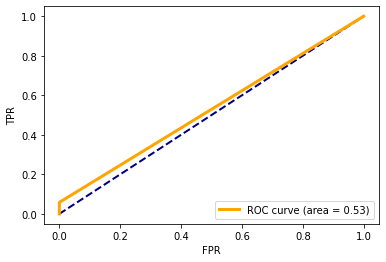

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc4=RandomForestClassifier(n_estimators=25,max_depth=8,criterion='gini')
score_model(rfc4,x_train,x_test,y_train,y_test)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
re_x_train, re_y_train= smote.fit_resample(x_train, y_train)
#re_x_train, re_y_train= smote.fit_resample(x_train, y_train)

[[12495  2241]
 [ 2686 12050]]
0.8328243756786102
0.8177252985884907
0.84318802043244
0.8302614806903916
[[5297 1018]
 [ 647 1689]]
0.8075367009594266
0.7230308219178082
0.6239379386775028
0.6698393813206424


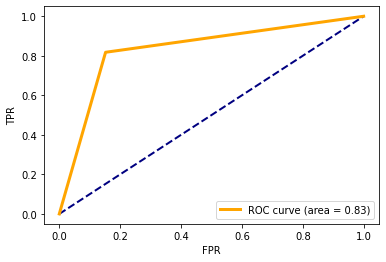

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc4=RandomForestClassifier(n_estimators=25,max_depth=8,criterion='gini')
score_model(rfc4,re_x_train,x_test,re_y_train,y_test)

In [ ]:
#model turing 

In [ ]:
# data analysis and wrangling
import numpy as np 
import pandas as pd 

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


[[ 9621  5115]
 [  659 14077]]
0.804085233441911
0.9552795874049945
0.733482701125469
0.8298160811129449
[[3948 2367]
 [ 219 2117]]
0.7010750202288752
0.90625
0.4721231043710972
0.6208211143695015


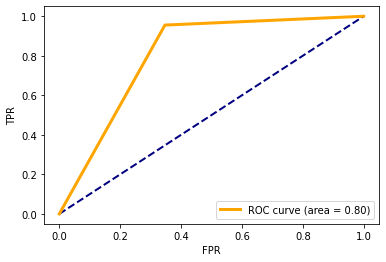

In [ ]:
knn_n43 = KNeighborsClassifier(n_neighbors=43)
score_model(knn_n43,re_x_train,x_test,re_y_train,y_test)

[[10907  3829]
 [  746 13990]]
0.8447679153094463
0.9493756786102063
0.7851170099332173
0.8594685916141914
[[4494 1821]
 [ 262 2074]]
0.7592185874465379
0.8878424657534246
0.5324775353016689
0.6657037393676777


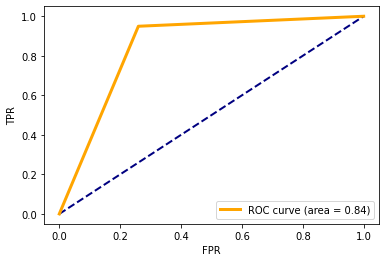

In [ ]:
knn_n43 = KNeighborsClassifier(n_neighbors=33)
score_model(knn_n43,re_x_train,x_test,re_y_train,y_test)




[[12093  2643]
 [  792 13944]]
0.8834486970684039
0.9462540716612378
0.8406583468981733
0.8903361746959103
[[5034 1281]
 [ 291 2045]]
0.8182869032481794
0.8754280821917808
0.6148526758869512
0.7223595902507948


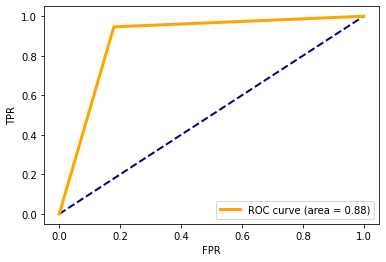

In [ ]:
knn_n43 = KNeighborsClassifier(n_neighbors=23)
score_model(knn_n43,re_x_train,x_test,re_y_train,y_test)




[[13089  1647]
 [  743 13993]]
0.9189060803474485
0.9495792616720955
0.894693094629156
0.9213194627337371
[[5414  901]
 [ 317 2019]]
0.8592070280892382
0.8642979452054794
0.6914383561643835
0.7682648401826484


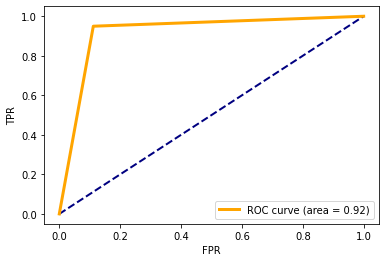

In [ ]:
knn_n43 = KNeighborsClassifier(n_neighbors=13)
score_model(knn_n43,re_x_train,x_test,re_y_train,y_test)




[[13929   807]
 [  273 14463]]
0.9633550488599348
0.9814739413680782
0.9471512770137525
0.9640071985602879
[[5654  661]
 [ 328 2008]]
0.8856779563056294
0.8595890410958904
0.7523417010116148
0.8023976023976023


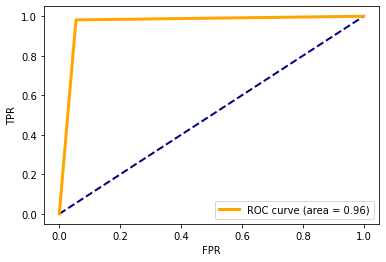

In [ ]:
knn_n43 = KNeighborsClassifier(n_neighbors=3)
score_model(knn_n43,re_x_train,x_test,re_y_train,y_test)


#best

[[14736     0]
 [    0 14736]]
1.0
1.0
1.0
1.0
[[5623  692]
 [ 411 1925]]
0.8725002889839325
0.8240582191780822
0.7355750859763087
0.7773066828184939


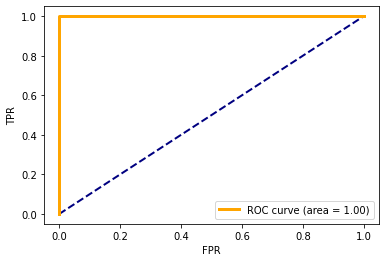

In [ ]:
knn_n43 = KNeighborsClassifier(n_neighbors=1)
score_model(knn_n43,re_x_train,x_test,re_y_train,y_test)




In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

[[14456   280]
 [  652 14084]]
0.9683767643865364
0.9557546145494028
0.9805068226120858
0.9679725085910653
[[6008  307]
 [ 515 1821]]
0.9049820829961854
0.7795376712328768
0.855733082706767
0.8158602150537635


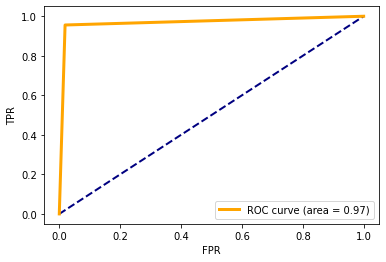

In [ ]:
xgb1=XGBClassifier()
score_model(xgb1,re_x_train,x_test,re_y_train,y_test)



In [ ]:
test.shape

(8912, 157)

In [ ]:
x_train.columns

Index(['AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
       'InsuredAge', 'CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod',
       'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit',
       ...
       'InsurancePolicyState_State2', 'InsurancePolicyState_State3',
       'Policy_CombinedSingleLimit_100/300',
       'Policy_CombinedSingleLimit_100/500',
       'Policy_CombinedSingleLimit_250/1000',
       'Policy_CombinedSingleLimit_250/300',
       'Policy_CombinedSingleLimit_250/500',
       'Policy_CombinedSingleLimit_500/1000',
       'Policy_CombinedSingleLimit_500/300',
       'Policy_CombinedSingleLimit_500/500'],
      dtype='object', length=158)

In [ ]:
test.columns

Index(['AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
       'InsuredAge', 'CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod',
       'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit',
       ...
       'InsurancePolicyState_State2', 'InsurancePolicyState_State3',
       'Policy_CombinedSingleLimit_100/300',
       'Policy_CombinedSingleLimit_100/500',
       'Policy_CombinedSingleLimit_250/1000',
       'Policy_CombinedSingleLimit_250/300',
       'Policy_CombinedSingleLimit_250/500',
       'Policy_CombinedSingleLimit_500/1000',
       'Policy_CombinedSingleLimit_500/300',
       'Policy_CombinedSingleLimit_500/500'],
      dtype='object', length=157)

In [ ]:
x_train.shape

(20185, 158)

In [ ]:
test_x=pd.read_csv('/content/drive/MyDrive/121_finial/Test.csv',na_values=['?','#',','])

In [ ]:
test_pred7=xgb1.predict(test)

ValueError: ignored

In [ ]:
test.to_csv('finial_test.csv', index=False)

In [ ]:
x_train.to_csv('finial_train1.csv', index=False)

In [ ]:
test.head(2)

,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,...,InsurancePolicyState_State2,InsurancePolicyState_State3,Policy_CombinedSingleLimit_100/300,Policy_CombinedSingleLimit_100/500,Policy_CombinedSingleLimit_250/1000,Policy_CombinedSingleLimit_250/300,Policy_CombinedSingleLimit_250/500,Policy_CombinedSingleLimit_500/1000,Policy_CombinedSingleLimit_500/300,Policy_CombinedSingleLimit_500/500
0,-0.107102,0.180745,0.881369,-1.481799,1.206530,-1.149638,-1.193342,1.621883,-1.117854,-0.496804,...,1,0,0,0,0,0,0,1,0,0
1,0.180799,-0.462942,0.241612,0.144403,1.217377,-1.457645,0.287655,-1.123568,0.108831,-0.496804,...,0,1,1,0,0,0,0,0,0,0


In [ ]:
re_x_train.head(2)

,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,...,InsurancePolicyState_State2,InsurancePolicyState_State3,Policy_CombinedSingleLimit_100/300,Policy_CombinedSingleLimit_100/500,Policy_CombinedSingleLimit_250/1000,Policy_CombinedSingleLimit_250/300,Policy_CombinedSingleLimit_250/500,Policy_CombinedSingleLimit_500/1000,Policy_CombinedSingleLimit_500/300,Policy_CombinedSingleLimit_500/500
0,0.417562,0.433059,0.966167,-0.355967,-0.832606,0.891807,-0.092601,-0.208418,0.832664,1.231612,...,0,1,1,0,0,0,0,0,0,0
1,0.913841,0.936090,0.428834,-1.356706,-0.832606,0.891807,-0.773060,-1.101605,1.145880,-0.496804,...,1,0,0,1,0,0,0,0,0,0
